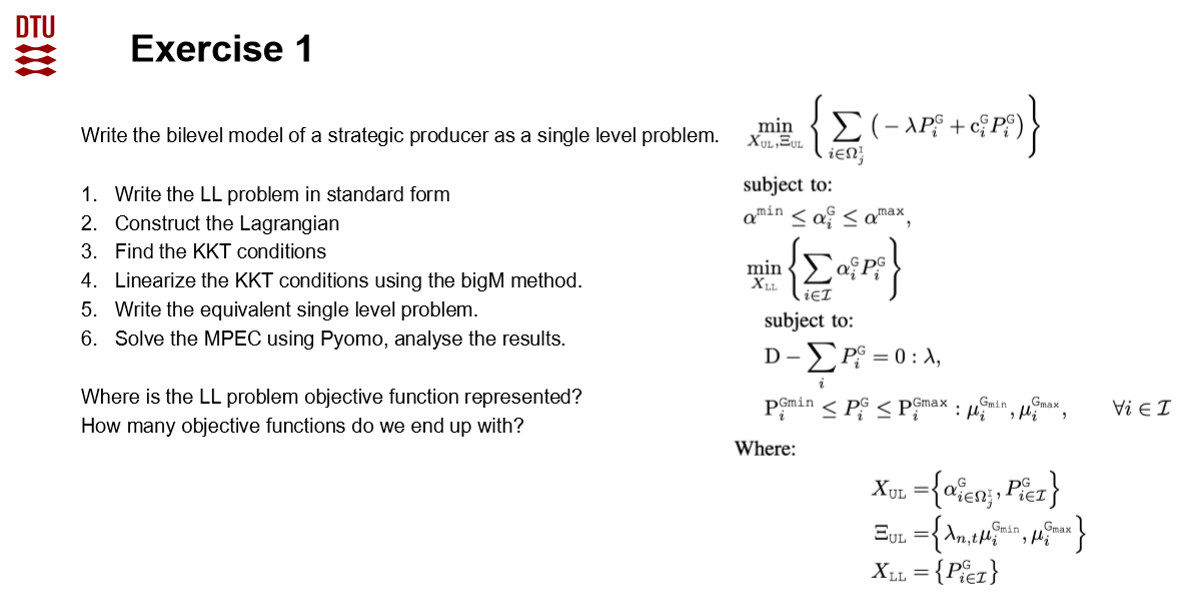

# Write the lower level problem in standard form 

\begin{equation*}
\min_{X_{LL}} \quad \left\{ \sum_{i \in \mathcal{I}} \alpha_i^{G} P_{i}^{G} \right\}
\end{equation*}

Subject to
\begin{align*}
D - \sum_{i \in \mathcal{I}} P_{i}^{G} &= 0 \quad : \lambda \\
P_{i}^{Gmin} - P_{i}^{G} &\leq 0 \quad : \mu_i^{min} \quad \forall i \in \mathcal{I} \\
P_{i}^{G} - P_{i}^{Gmax} &\leq 0 \quad : \mu_i^{max} \quad \forall i \in \mathcal{I} \\
\end{align*}


From this the Lagrangian can be written as
\begin{align*}
\mathcal{L}(P^{G}, \lambda, \mu^{min}, \mu^{max}) = &\sum_{i \in \mathcal{I}} \alpha_i^{G} P_{i}^{G} \\
+&\lambda \left( D - \sum_{i \in \mathcal{I}} P_{i}^{G} \right) \\
+&\sum_{i \in \mathcal{I}} \mu_i^{min} \left( P_{i}^{Gmin} - P_{i}^{G} \right) \\
+&\sum_{i \in \mathcal{I}} \mu_i^{max} \left( P_{i}^{G} - P_{i}^{Gmax} \right)
\end{align*}

The KKT conditions can the be written as: 
\begin{align*}
\frac{\partial \mathcal{L}(x, \lambda, \mu)}{\partial x} &= 0 \\
h(x) &= 0 \\
0 \leq -g(x) &\perp \mu \geq 0 \\
\lambda &\in \text{free}
\end{align*}
Which for this problem becomes:

\begin{align*}
\frac{\partial \mathcal{L}(P_{i}^{G}, \lambda, \mu_i^{min}, \mu_i^{max})}{\partial P_{i}^{G}} &= \alpha_i^{G} - \lambda - \mu_i^{min} + \mu_i^{max} = 0 && \forall i \in \mathcal{I} \\
h(P^{G}) &= D - \sum_{i \in \mathcal{I}} P_{i}^{G} = 0 \\
0 \leq P_{i}^{G} - P_{i}^{Gmin} &\perp \mu_i^{min} \geq 0 && \forall i \in \mathcal{I} \\
0 \leq P_{i}^{Gmax} - P_{i}^{G} &\perp \mu_i^{max} \geq 0 && \forall i \in \mathcal{I} \\
\lambda &\in \text{free}
\end{align*}

This can be linearized by introducing a $z_i$-binary variable for each generator $i$ (and for min and max) such that the KKT conditions become:
\begin{align*}
\alpha_i^{G} - \lambda - \mu_i^{min} + \mu_i^{max} &= 0 &&\forall i \in \mathcal{I} \\
D - \sum_{i \in \mathcal{I}} P_{i}^{G} &= 0 \\
0 &\leq P_{i}^{G} - P_{i}^{Gmin} &&\forall i \in \mathcal{I} \\
P_{i}^{G} - P_{i}^{Gmin}  &\leq M z^{min}_i &&\forall i \in \mathcal{I} \\
0 &\leq \mu_i^{min} &&\forall i \in \mathcal{I} \\
\mu_i^{min} &\leq M (1-z^{min}_i) &&\forall i \in \mathcal{I} \\
0 &\leq P_{i}^{Gmax} - P_{i}^{G} &&\forall i \in \mathcal{I} \\
P_{i}^{Gmax} - P_{i}^{G} &\leq M z^{max}_i &&\forall i \in \mathcal{I} \\
0 &\leq \mu_i^{max} &&\forall i \in \mathcal{I} \\
\mu_i^{max} &\leq M (1-z^{max}_i) &&\forall i \in \mathcal{I} \\
z^{min}_i, z^{max}_i &\in \{0,1\} &&\forall i \in \mathcal{I} \\
\end{align*}

Substituting the KKT conditions into the upper level problem gives:
\begin{equation*}
\min_{X_{UL}, \Xi_{UL}} \left\{ \sum_{i \in \Omega_j} (-\lambda P_{i}^{G} + c_i^G P_{i}^{G}) \right\}
\end{equation*}
Subject to:
\begin{align*}
\alpha^{min} \leq \alpha_i^{G} &\leq \alpha^{max} &&\forall i \in \Omega_j \\
\end{align*}
Then inserting the KKT conditions as the constraints:
\begin{align*}
\alpha_i^{G} - \lambda - \mu_i^{min} + \mu_i^{max} &= 0 &&\forall i \in \mathcal{I} \\
D - \sum_{i \in \mathcal{I}} P_{i}^{G} &= 0 \\
0 &\leq P_{i}^{G} - P_{i}^{Gmin} &&\forall i \in \mathcal{I} \\
P_{i}^{G} - P_{i}^{Gmin}  &\leq M z^{min}_i &&\forall i \in \mathcal{I} \\
0 &\leq \mu_i^{min} &&\forall i \in \mathcal{I} \\
\mu_i^{min} &\leq M (1-z^{min}_i) &&\forall i \in \mathcal{I} \\
0 &\leq P_{i}^{Gmax} - P_{i}^{G} &&\forall i \in \mathcal{I} \\
P_{i}^{Gmax} - P_{i}^{G} &\leq M z^{max}_i &&\forall i \in \mathcal{I} \\
0 &\leq \mu_i^{max} &&\forall i \in \mathcal{I} \\
\mu_i^{max} &\leq M (1-z^{max}_i) &&\forall i \in \mathcal{I} \\
z^{min}_i, z^{max}_i &\in \{0,1\} &&\forall i \in \mathcal{I} \\
\end{align*}

In [103]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt

class StrategicProducer:
    def __init__(self, alpha_min, alpha_max, Pmin, Pmax, cost, demand, SOS1=False):
        self.alpha_min = alpha_min
        self.alpha_max = alpha_max
        self.Pmin = Pmin
        self.Pmax = Pmax
        self.cost = cost
        self.demand = demand
        self.SOS1 = SOS1

        self.num_generators = len(Pmin)

        self._build_model(SOS1)
        self.solve()

    def _build_model(self, SOS1 = False):
        self.model = ConcreteModel()

        self.model.n_gen = Set(initialize=range(self.num_generators))
        self.model.strategic_index = Set(initialize=[0])  # Index of the strategic producer

        self._build_variables(SOS1)
        self._build_objective()
        self._build_constraints(SOS1)

    def _build_variables(self, SOS1 = False):
        self.model.P_G = Var(self.model.n_gen, domain=Reals)
        self.model.alpha = Var(domain=Reals)
        self.model.lambda_dual = Var(domain=Reals)
        self.model.mu_min = Var(self.model.n_gen, domain=Reals)
        self.model.mu_max = Var(self.model.n_gen, domain=Reals)
        if SOS1 is False:
            self.model.z_min = Var(self.model.n_gen, domain=Binary)
            self.model.z_max = Var(self.model.n_gen, domain=Binary)
        else:
            # Slack variables (instead of z_min/z_max)
            self.model.slack_min = Var(self.model.n_gen, domain=NonNegativeReals)
            self.model.slack_max = Var(self.model.n_gen, domain=NonNegativeReals)

    def _build_objective(self):
        self.model.objective = Objective(
            expr=sum(
                -self.model.lambda_dual * self.model.P_G[i] + self.cost[i] * self.model.P_G[i]
                for i in self.model.strategic_index
            ),
            sense=minimize
        )

    def _build_constraints(self, SOS1 = False):
        
        # Alpha constraints
        self.model.alpha_constraint_min = Constraint(expr=self.model.alpha >= self.alpha_min)
        self.model.alpha_constraint_max = Constraint(expr=self.model.alpha <= self.alpha_max)

        # Power balance constraint
        self.model.power_balance = Constraint(expr=sum(self.model.P_G[i] for i in range(self.num_generators)) == self.demand)

        def stationarity_rule(m, i):
            return m.alpha - m.lambda_dual - m.mu_min[i] + m.mu_max[i] == 0

        self.model.stationarity = Constraint(self.model.strategic_index, rule=stationarity_rule)

        def stationarity_non_strategic_rule(m, i):
            return self.cost[i] - m.lambda_dual - m.mu_min[i] + m.mu_max[i] == 0
        
        self.model.stationarity_non_strategic = Constraint(
            self.model.n_gen - self.model.strategic_index, rule=stationarity_non_strategic_rule
        )
        if SOS1 is False:
            # ------------------------
            # Big-M + binary formulation
            # ------------------------
            M = 1000

            # min bound
            def gen_min_lower_rule(m, i):
                return m.P_G[i] - self.Pmin[i] >= 0
            self.model.gen_min_lower = Constraint(self.model.n_gen, rule=gen_min_lower_rule)

            def gen_min_upper_rule(m, i):
                return m.P_G[i] - self.Pmin[i] <= M * m.z_min[i]
            self.model.gen_min_upper = Constraint(self.model.n_gen, rule=gen_min_upper_rule)

            def mu_min_lower_rule(m, i):
                return m.mu_min[i] >= 0
            self.model.mu_min_lower = Constraint(self.model.n_gen, rule=mu_min_lower_rule)

            def mu_min_upper_rule(m, i):
                return m.mu_min[i] <= M * (1 - m.z_min[i])
            self.model.mu_min_upper = Constraint(self.model.n_gen, rule=mu_min_upper_rule)

            # max bound
            def gen_max_lower_rule(m, i):
                return self.Pmax[i] - m.P_G[i] >= 0
            self.model.gen_max_lower = Constraint(self.model.n_gen, rule=gen_max_lower_rule)

            def gen_max_upper_rule(m, i):
                return self.Pmax[i] - m.P_G[i] <= M * m.z_max[i]
            self.model.gen_max_upper = Constraint(self.model.n_gen, rule=gen_max_upper_rule)

            def mu_max_upper_rule(m, i):
                return m.mu_max[i] <= M * (1 - m.z_max[i])
            self.model.mu_max_upper = Constraint(self.model.n_gen, rule=mu_max_upper_rule)

            def mu_max_lower_rule(m, i):
                return m.mu_max[i] >= 0
            self.model.mu_max_lower = Constraint(self.model.n_gen, rule=mu_max_lower_rule)
        
        else:
           # Link primal bounds
            def gen_min_rule(m, i):
                return m.P_G[i] - self.Pmin[i] == m.slack_min[i]
            self.model.gen_min = Constraint(self.model.n_gen, rule=gen_min_rule)

            def gen_max_rule(m, i):
                return self.Pmax[i] - m.P_G[i] == m.slack_max[i]
            self.model.gen_max = Constraint(self.model.n_gen, rule=gen_max_rule)

            # Dual feasibility
            def mu_min_nonneg(m, i): return m.mu_min[i] >= 0
            def mu_max_nonneg(m, i): return m.mu_max[i] >= 0
            self.model.mu_min_nonneg = Constraint(self.model.n_gen, rule=mu_min_nonneg)
            self.model.mu_max_nonneg = Constraint(self.model.n_gen, rule=mu_max_nonneg)

            # SOS1 complementarity: build tiny indexed Var per generator
            for i in self.model.n_gen:
                # Create a 2-element Var to hold [slack, mu]
                vpair_min = Var([0, 1])
                vpair_max = Var([0, 1])
                self.model.add_component(f"sos1pair_min_{i}", vpair_min)
                self.model.add_component(f"sos1pair_max_{i}", vpair_max)

                # Link to real variables
                self.model.add_component(f"link_min_slack_{i}",
                    Constraint(expr=vpair_min[0] == self.model.slack_min[i]))
                self.model.add_component(f"link_min_mu_{i}",
                    Constraint(expr=vpair_min[1] == self.model.mu_min[i]))

                self.model.add_component(f"link_max_slack_{i}",
                    Constraint(expr=vpair_max[0] == self.model.slack_max[i]))
                self.model.add_component(f"link_max_mu_{i}",
                    Constraint(expr=vpair_max[1] == self.model.mu_max[i]))

                # Add SOS1
                self.model.add_component(f"sos1_min_{i}", SOSConstraint(var=vpair_min, sos=1))
                self.model.add_component(f"sos1_max_{i}", SOSConstraint(var=vpair_max, sos=1))

    def solve(self, solver_name="gurobi"):
        """
        Solve the optimization model.

        Parameters
        ----------
        solver_name : str, optional
            Name of the solver to use (default: "gurobi").
        tee : bool, optional
            If True, prints solver log output.
        """

        # Build model components if not already built
        if not hasattr(self, "model"):
            self._build_model()
            self._build_variables()
            self._build_constraints()

        # Create solver
        solver = SolverFactory(solver_name)

        # Solve
        results = solver.solve(self.model, tee=False)

        # Check solver status
        if (results.solver.status == 'ok') and (results.solver.termination_condition == 'optimal'):
            print("Optimal solution found for strategic producer problem.")
        else:
            print("Solver status:", results.solver.status)
            print("Termination condition:", results.solver.termination_condition)

        # Display results
        # self._display_results()
    
    def _display_results(self):
        print("\nOptimal Generation and Prices:")
        for i in self.model.n_gen:
            print(f"Generator {i}: P_G = {self.model.P_G[i].value:.2f}, mu_min = {self.model.mu_min[i].value:.2f}, mu_max = {self.model.mu_max[i].value:.2f}")
        print(f"Market Price (lambda): {self.model.lambda_dual.value:.2f}")
        print(f"Strategic Producer's Bid (alpha): {self.model.alpha.value:.2f}")
        print(f"Objective Value (Profit): {-self.model.objective():.2f}")

    def economic_dispatch(self):
        """
        Solve the economic dispatch problem (non-strategic).
        """
        model = ConcreteModel()
        model.n_gen = Set(initialize=range(self.num_generators))
        model.P_G = Var(model.n_gen, domain=NonNegativeReals)
        model.objective = Objective(
            expr=sum(self.cost[i] * model.P_G[i] for i in model.n_gen),
            sense=minimize
        )
        model.power_balance = Constraint(expr=self.demand - sum(model.P_G[i] for i in model.n_gen) == 0)

        model.gen_min = Constraint(model.n_gen, rule=lambda m, i: model.P_G[i] >= self.Pmin[i])
        model.gen_max = Constraint(model.n_gen, rule=lambda m, i: model.P_G[i] <= self.Pmax[i])

        # Attach suffix to capture duals
        model.dual = Suffix(direction=Suffix.IMPORT)

        solver = SolverFactory("gurobi")
        results = solver.solve(model, tee=False)
        if (results.solver.status == 'ok') and (results.solver.termination_condition == 'optimal'):
            print("Optimal solution found for economic dispatch.")
            dispatch = {i: model.P_G[i].value for i in model.n_gen}
            clearing_price = -model.dual[model.power_balance]
            return dispatch, clearing_price
        else:
            print("Solver status:", results.solver.status)
            print("Termination condition:", results.solver.termination_condition)

    def plot_merit_order(self, dispatch, clearing_price):
        cost_array = np.array(self.cost)
        pmax_array = np.array(self.Pmax)

        # Sort generators by cost
        gen_sorted_idx = np.argsort(cost_array)
        gen_sorted_costs = cost_array[gen_sorted_idx]
        gen_sorted_caps = pmax_array[gen_sorted_idx]

        plt.figure(figsize=(10, 6))


        # Build stepwise supply curve
        gen_curve_x = [0]
        gen_curve_y = [0]
        cum_cap = 0
        
        for idx, (c, cap) in zip(gen_sorted_idx, zip(gen_sorted_costs, gen_sorted_caps)):
            # horizontal start
            gen_curve_x.append(cum_cap)
            gen_curve_y.append(c)
            # vertical end
            cum_cap += cap
            gen_curve_x.append(cum_cap)
            gen_curve_y.append(c)

            # --- annotate generator index ---
            midpoint = cum_cap - cap / 2
            plt.text(midpoint, c - 0.1, f"G{idx}", ha='center', va='top', fontsize=9, color="blue")

        # --- Demand (inelastic vertical line) ---
        demand = self.demand   # e.g. 200
        demand_curve_x = [demand, demand]
        demand_curve_y = [0, max(gen_curve_y) * 1.2]

        # --- Plot ---
        
        plt.step(gen_curve_x, gen_curve_y, where='post', label='Supply (Generators)', color='blue')
        plt.plot(demand_curve_x, demand_curve_y, 'r--', label=f'Demand = {demand}')

        # Mark clearing price
        plt.axhline(y=-clearing_price, color='green', linestyle='--',
                    label=f'Clearing Price = {-clearing_price:.2f}')
        plt.scatter([demand], [-clearing_price], color='black', zorder=5, label='Market Clearing Point')

        plt.ylim(bottom=0, top=max(gen_curve_y) * 1.2)
        plt.xlabel('Quantity')
        plt.ylabel('Price')
        plt.title('Merit Order Curve')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_merit_order_with_strategic(self, dispatch_ED, clearing_price_ED,
                                    dispatch_SP, clearing_price_SP):
        cost_array = np.array(self.cost)
        pmax_array = np.array(self.Pmax)

        # --- Economic Dispatch (baseline merit order) ---
        gen_sorted_idx = np.argsort(cost_array)
        gen_sorted_costs = cost_array[gen_sorted_idx]
        gen_sorted_caps = pmax_array[gen_sorted_idx]

        plt.figure(figsize=(10, 6))

        gen_curve_x = [0]
        gen_curve_y = [0]
        cum_cap = 0
        for idx, (c, cap) in zip(gen_sorted_idx, zip(gen_sorted_costs, gen_sorted_caps)):
            gen_curve_x.append(cum_cap)
            gen_curve_y.append(c)
            cum_cap += cap
            gen_curve_x.append(cum_cap)
            gen_curve_y.append(c)

            # Label under ED supply line
            midpoint = cum_cap - cap / 2
            plt.text(midpoint, c - 0.2, f"G{idx}", ha='center', va='top', fontsize=8, color="blue")

        # Plot ED supply curve
        plt.step(gen_curve_x, gen_curve_y, where='post', color='blue', label='Supply (ED)')

        # --- Strategic Producer Case ---
        sp_costs = cost_array.copy()
        # Replace strategic producer's cost with its chosen bid (alpha)
        for i in self.model.strategic_index:
            sp_costs[i] = self.model.alpha.value  

        gen_sorted_idx_SP = np.argsort(sp_costs)
        gen_sorted_costs_SP = sp_costs[gen_sorted_idx_SP]
        gen_sorted_caps_SP = pmax_array[gen_sorted_idx_SP]

        gen_curve_x_SP = [0]
        gen_curve_y_SP = [0]
        cum_cap_SP = 0
        for idx, (c, cap) in zip(gen_sorted_idx_SP, zip(gen_sorted_costs_SP, gen_sorted_caps_SP)):
            gen_curve_x_SP.append(cum_cap_SP)
            gen_curve_y_SP.append(c)
            cum_cap_SP += cap
            gen_curve_x_SP.append(cum_cap_SP)
            gen_curve_y_SP.append(c)

            # Label under SP supply line
            midpoint_SP = cum_cap_SP - cap / 2
            plt.text(midpoint_SP, c - 0.2, f"G{idx}", ha='center', va='top', fontsize=8, color="purple")

        # Plot SP supply curve
        plt.step(gen_curve_x_SP, gen_curve_y_SP, where='post', color='purple', linestyle='--', label='Supply (SP)')

        # --- Demand ---
        demand = self.demand
        plt.axvline(demand, color='red', linestyle='--', label=f'Demand = {demand}')

        # --- Clearing prices ---
        plt.scatter([demand], [clearing_price_ED], color='green', zorder=5, marker='o', label=f'ED Price = {clearing_price_ED:.2f}', s = 100)
        plt.scatter([demand], [clearing_price_SP], color='magenta', zorder=5, marker='x', label=f'SP Price = {clearing_price_SP:.2f}', s = 100)

        # --- Formatting ---
        plt.xlabel('Quantity')
        plt.ylabel('Price')
        plt.title('Merit Order Curve: ED vs Strategic Producer')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print comparison
        print("Dispatch Comparison (ED vs SP):")
        print("  Gen   Cost(ED)  Cost(SP)   ED [MW]   SP [MW]")
        print("  ---  --------- ---------  --------  --------")

        for i in range(len(cost_array)):
            # In SP case, replace strategic cost with alpha
            cost_sp = self.model.alpha.value if i in self.model.strategic_index else self.cost[i]

            line = (
                f"  {i:2d}   "
                f"{self.cost[i]:9.2f} "
                f"{cost_sp:9.2f} "
                f"{dispatch_ED[i]:8.2f}  "
                f"{dispatch_SP[i]:8.2f}"
            )
            print(line)

        print()
        print(f"  Strategic producer bid (alpha): {self.model.alpha.value:8.2f}")
        print(f"  Profit from strategic bidding : {(clearing_price_SP - self.cost[0]) * dispatch_SP[0]:8.2f}")
        print(f"  Clearing price (ED)           : {clearing_price_ED:8.2f}")
        print(f"  Clearing price (SP)           : {clearing_price_SP:8.2f}")
        print()

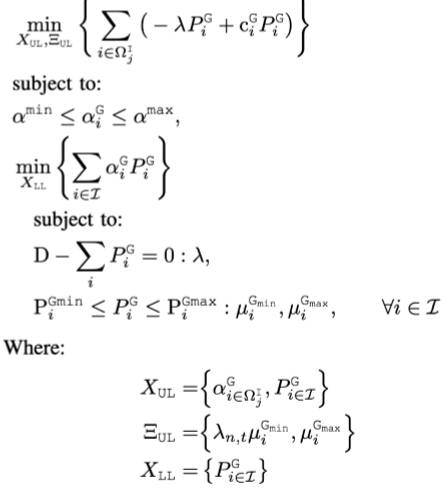
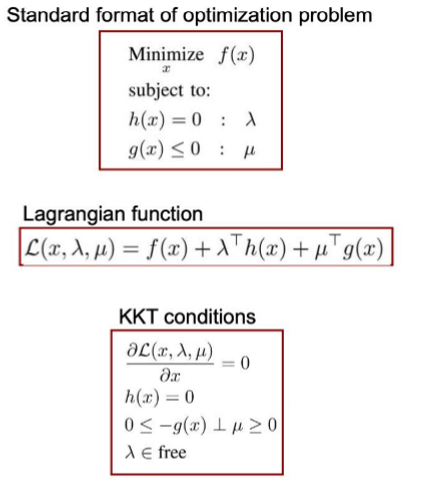

Optimal solution found for strategic producer problem.


Optimal solution found for economic dispatch.


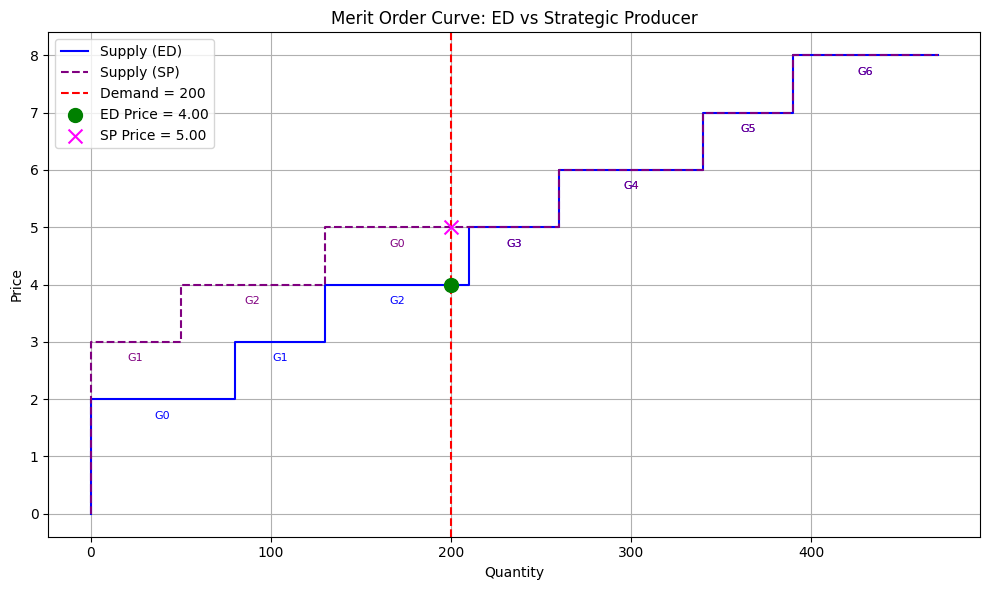

Dispatch Comparison (ED vs SP):
  Gen   Cost(ED)  Cost(SP)   ED [MW]   SP [MW]
  ---  --------- ---------  --------  --------
   0        2.00      5.00    80.00     70.00
   1        3.00      3.00    50.00     50.00
   2        4.00      4.00    70.00     80.00
   3        5.00      5.00     0.00      0.00
   4        6.00      6.00     0.00      0.00
   5        7.00      7.00     0.00      0.00
   6        8.00      8.00     0.00      0.00

  Strategic producer bid (alpha):     5.00
  Profit from strategic bidding :   210.00
  Clearing price (ED)           :     4.00
  Clearing price (SP)           :     5.00



In [104]:
alpha_min = 0
alpha_max = 1000
Pmin = [0, 0, 0, 0, 0, 0, 0]
Pmax = [80, 50, 80, 50, 80, 50, 80]
cost = [2, 3, 4, 5, 6, 7, 8]
demand = 200
SOS1 = False  # Set to True to use SOS1 formulation, False for Big-M

problem = StrategicProducer(alpha_min, alpha_max, Pmin, Pmax, cost, demand, SOS1)

# Baseline competitive economic dispatch
dispatch_ED, clearing_price_ED = problem.economic_dispatch()

# Strategic producer problem
dispatch_SP = {i: problem.model.P_G[i].value for i in problem.model.n_gen}
clearing_price_SP = problem.model.lambda_dual.value

problem.plot_merit_order_with_strategic(dispatch_ED, clearing_price_ED,
                                        dispatch_SP, clearing_price_SP)

Optimal solution found for strategic producer problem.
Optimal solution found for economic dispatch.


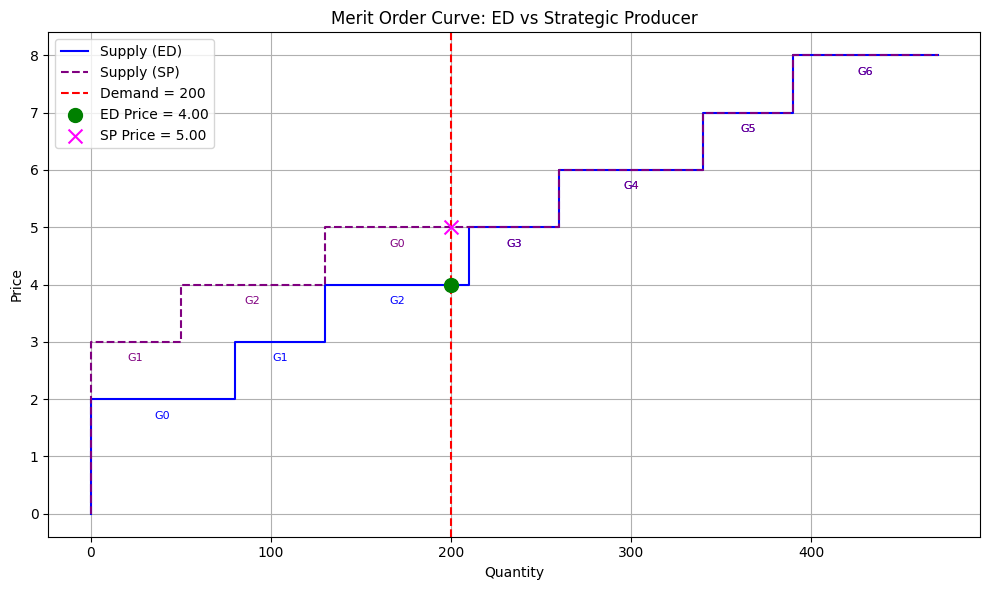

Dispatch Comparison (ED vs SP):
  Gen   Cost(ED)  Cost(SP)   ED [MW]   SP [MW]
  ---  --------- ---------  --------  --------
   0        2.00      5.00    80.00     70.00
   1        3.00      3.00    50.00     50.00
   2        4.00      4.00    70.00     80.00
   3        5.00      5.00     0.00      0.00
   4        6.00      6.00     0.00      0.00
   5        7.00      7.00     0.00      0.00
   6        8.00      8.00     0.00      0.00

  Strategic producer bid (alpha):     5.00
  Profit from strategic bidding :   210.00
  Clearing price (ED)           :     4.00
  Clearing price (SP)           :     5.00



In [105]:
alpha_min = 0
alpha_max = 1000
Pmin = [0, 0, 0, 0, 0, 0, 0]
Pmax = [80, 50, 80, 50, 80, 50, 80]
cost = [2, 3, 4, 5, 6, 7, 8]
demand = 200
SOS1 = True  # Set to True to use SOS1 formulation, False for Big-M

problem = StrategicProducer(alpha_min, alpha_max, Pmin, Pmax, cost, demand, SOS1)

# Baseline competitive economic dispatch
dispatch_ED, clearing_price_ED = problem.economic_dispatch()

# Strategic producer problem
dispatch_SP = {i: problem.model.P_G[i].value for i in problem.model.n_gen}
clearing_price_SP = problem.model.lambda_dual.value

problem.plot_merit_order_with_strategic(dispatch_ED, clearing_price_ED,
                                        dispatch_SP, clearing_price_SP)